In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/[핀테크 과정] 머신러닝 팀플/딥러닝/glowpick_realtotal.csv')
rating_mapping = {5:1, 4:1, 3:0, 2:0, 1:0} 
df['label'] = df['rating'].map(rating_mapping)

In [0]:
df.head()

Unnamed: 0  ... label
0           0  ...     1
1           1  ...     1
2           2  ...     1
3           3  ...     1
4           4  ...     1

[5 rows x 9 columns]

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


(53599, 8)
   rating  count
0       1    893
1       2   3962
2       3   9894
3       4  21022
4       5  17828


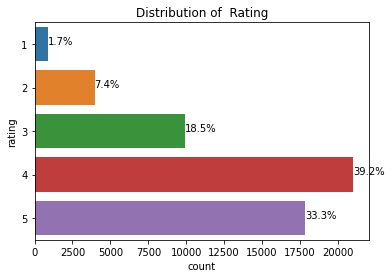

In [0]:
print(df.shape)
print(df.groupby('rating').size().reset_index(name='count'))


ax = sns.countplot(y="rating", data=df)
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Distribution of  Rating')
plt.show()

In [0]:
print(df.shape)
print(df.groupby('label').size().reset_index(name='count'))


ax = sns.countplot(y="label", data=df)
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Distribution of  Label')
plt.show()

(53599, 9)
   label  count
0      0  14749
1      1  38850


In [0]:
for i in [1,2,3,4,5]:
    print(df.groupby('rating').size()[i] / len(df))

0.023351719160781485
0.07634414145059024
0.18655600804165162
0.3874942007319965
0.32625393061498015


In [0]:
'''
1) rating 카테고리 비율을 유지해서 train-test 나누면 좋겠다
'''

'\n1) rating 카테고리 비율을 유지해서 train-test 나누면 좋겠다\n'

In [0]:
y = df['rating']
X = df.drop('rating', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=99, shuffle=True, stratify=y)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15519, 6) (3880, 6) (15519,) (3880,)


In [0]:
# 이 노트 코드 참고해서 각자 LSTM / BERT 노트에 적용해주세요